In [1]:
# SVM MODEL

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
# Classification

Categories=['A', 'B', 'C', 'D', 
            'E', 'F', 'G', 'H', 
            'I', 'J', 'K', 'L', 
            'M', 'N', 'O', 'P',
            'Q', 'R', 'S', 'T', 
            'U', 'V', 'W', 'X', 
            'Y', 'Z']

print("Type y to give categories or type n to go with classification of A to Z");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not in drive Please upload all the {n} category images with the same names as given in categories")



Type y to give categories or type n to go with classification of A to Z
n


In [3]:
# Loading Data

flat_data_arr=[]
target_arr=[]
datadir='K:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet'
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(100,100,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
df

loading... category : A
loaded category:A successfully
loading... category : B
loaded category:B successfully
loading... category : C
loaded category:C successfully
loading... category : D
loaded category:D successfully
loading... category : E
loaded category:E successfully
loading... category : F
loaded category:F successfully
loading... category : G
loaded category:G successfully
loading... category : H
loaded category:H successfully
loading... category : I
loaded category:I successfully
loading... category : J
loaded category:J successfully
loading... category : K
loaded category:K successfully
loading... category : L
loaded category:L successfully
loading... category : M
loaded category:M successfully
loading... category : N
loaded category:N successfully
loading... category : O
loaded category:O successfully
loading... category : P
loaded category:P successfully
loading... category : Q
loaded category:Q successfully
loading... category : R
loaded category:R successfully
loading...

0         1         2         3         4         5         6  \
0    0.044784  0.040863  0.095765  0.054902  0.050980  0.105882  0.052157   
1    0.047685  0.047685  0.094744  0.053407  0.051760  0.102113  0.053255   
2    0.033020  0.040863  0.091843  0.048157  0.056000  0.106980  0.048455   
3    0.036392  0.044235  0.095216  0.048157  0.056000  0.106980  0.048071   
4    0.036392  0.044235  0.091294  0.046431  0.054275  0.102980  0.048235   
..        ...       ...       ...       ...       ...       ...       ...   
515  0.030824  0.042588  0.109255  0.027451  0.037569  0.100941  0.030196   
516  0.044072  0.047994  0.118582  0.028176  0.035391  0.104333  0.022180   
517  0.045489  0.053332  0.112155  0.029407  0.037250  0.096074  0.027537   
518  0.035448  0.039369  0.109958  0.030187  0.035755  0.101402  0.028251   
519  0.037173  0.041095  0.111683  0.029956  0.033878  0.104466  0.031129   

            7         8         9  ...     29991     29992     29993  \
0    0.048235  0.103137  0.039451  ...  0.060855  0.128376  0.085396   
1    0.049333  0.104235  0.036706  ...  0.062886  0.135843  0.084635   
2    0.056298  0.107278  0.036078  ...  0.053624  0.133027  0.095365   
3    0.055914  0.106894  0.039373  ...  0.055984  0.135388  0.089882   
4    0.056078  0.107059  0.036067  ...  0.065804  0.133875  0.090894   
..        ...       ...       ...  ...       ...       ...       ...   
515  0.038039  0.096863  0.031373  ...  0.061812  0.142282  0.090063   
516  0.033945  0.100612  0.023462  ...  0.067082  0.138063  0.094753   
517  0.035380  0.094204  0.028549  ...  0.065184  0.137176  0.101875   
518  0.036094  0.094918  0.032403  ...  0.053961  0.131059  0.101247   
519  0.035051  0.105639  0.035776  ...  0.061812  0.131616  0.096392   

        29994     29995     29996     29997     29998     29999  Target  
0    0.061656  0.168480  0.090515  0.093959  0.240158  0.125650       0  
1    0.059239  0.168480  0.080397  0.106033  0.246431  0.123531       0  
2    0.050925  0.168231  0.089098  0.095915  0.249881  0.131451       0  
3    0.052882  0.166275  0.081255  0.097332  0.247453  0.121652       0  
4    0.056176  0.167460  0.087220  0.096860  0.250825  0.132395       0  
..        ...       ...       ...       ...       ...       ...     ...  
515  0.036356  0.148475  0.059931  0.082965  0.229647  0.113722      25  
516  0.038543  0.148784  0.068083  0.089238  0.236151  0.126894      25  
517  0.039729  0.150750  0.073573  0.083437  0.230196  0.115139      25  
518  0.040268  0.151289  0.074113  0.083437  0.233096  0.108394      25  
519  0.036356  0.144632  0.070598  0.080536  0.227373  0.124861      25  

[520 rows x 30001 columns]

In [4]:
# Splitted Data

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [5]:
# Training Data

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [6]:
# Prediction Data

y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([13, 14,  8, 22, 25,  6,  1,  4, 25, 17,  4, 14, 14,  7, 15,  1, 22,
        2, 22,  1, 18, 12,  9,  8, 10,  9, 19, 18, 14, 21, 19, 16,  5,  8,
       15,  7, 11,  9,  4, 17,  3,  9, 16, 22,  7,  0, 13, 20, 16, 19,  3,
        7, 24, 15,  3,  0, 10,  2, 23,  6, 12,  0,  6, 20,  3, 16, 17,  5,
       10,  6, 20, 23, 11, 19, 12, 12,  0, 11, 10, 24, 21,  1, 25, 15, 21,
       24, 13,  4, 18, 17, 25, 21,  5,  8, 23,  5, 18, 24, 23,  2, 20, 13,
        2, 11])

In [7]:
# Actual Data

print("The actual data is:")
np.array(y_test)

The actual data is:


array([13, 14,  8, 22, 25,  6,  1,  4, 25, 17,  4, 14, 14,  7, 15,  1, 22,
        2, 22,  1, 18, 12,  9,  8, 10,  9, 19, 18, 14, 21, 19, 16,  5,  8,
       15,  7, 11,  9,  4, 17,  3,  9, 16, 22,  7,  0, 13, 20, 16, 19,  3,
        7, 24, 15,  3,  0, 10,  2, 23,  6, 12,  0,  6, 20,  3, 16, 17,  5,
       10,  6, 20, 23, 11, 19, 12, 12,  0, 11, 10, 24, 21,  1, 25, 15, 21,
       24, 13,  4, 18, 17, 25, 21,  5,  8, 23,  5, 18, 24, 23,  2, 20, 13,
        2, 11])

In [8]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 100.0% accurate


In [9]:
pickle.dump(model,open('img_model_alpha.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\A\13.jpg


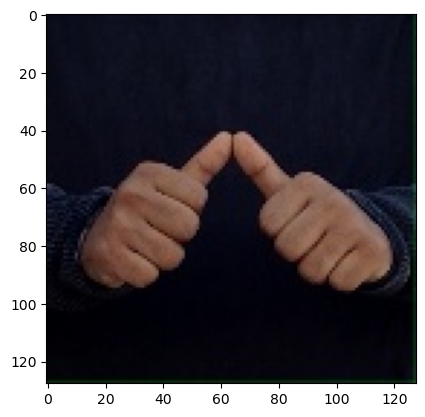

A = 49.53058101259025%
B = 2.570954191122819%
C = 2.170475140711446%
D = 0.4330504396512066%
E = 0.9397071392466996%
F = 0.590665617498807%
G = 2.219791480032724%
H = 0.38252446776989685%
I = 4.579064648610333%
J = 0.6366137672239001%
K = 1.0265547206072414%
L = 0.9114071321710583%
M = 0.4718261646264021%
N = 0.808063474211828%
O = 1.3071871819610261%
P = 2.8521375300390885%
Q = 3.6579760931385867%
R = 0.3094408452070998%
S = 1.0938889821032316%
T = 0.7560299862011143%
U = 2.2838823425337216%
V = 5.391763172788253%
W = 4.535281902750134%
X = 6.618534890590959%
Y = 1.928606446810517%
Z = 1.993991229801683%
The predicted image is : A
Is the image a A ?(y/n)
y
Thank you for giving your feedback


In [10]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\B\14.jpg


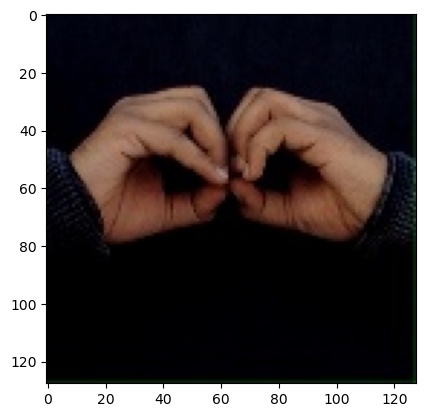

A = 3.8739198109279416%
B = 49.642807391329605%
C = 1.5450501867867152%
D = 0.4516244832305466%
E = 0.7635856266148576%
F = 0.5529813455293989%
G = 2.427456984235356%
H = 0.40183384819166357%
I = 3.6430930309321266%
J = 0.5855241113018715%
K = 1.050015775357962%
L = 0.7708211181789255%
M = 0.5527207101528451%
N = 1.1402185309054405%
O = 1.44500082923594%
P = 3.2391845222479128%
Q = 4.3648516088580385%
R = 0.3499241399414578%
S = 1.1541521904917231%
T = 0.7799865831202557%
U = 2.196445632950931%
V = 5.845074473460887%
W = 2.4076354076528994%
X = 7.086438261960455%
Y = 2.125641873829773%
Z = 1.6040115225742957%
The predicted image is : B
Is the image a B ?(y/n)
y
Thank you for giving your feedback


In [11]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\C\14.jpg


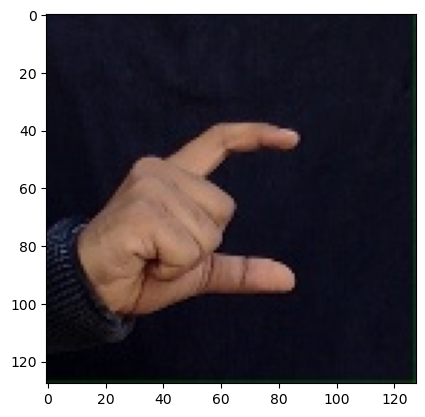

A = 4.967868720107981%
B = 1.8767925275519612%
C = 49.26163832613273%
D = 0.5407977887946104%
E = 1.0913057441571445%
F = 0.7054679748725554%
G = 1.7763262034557925%
H = 0.3763664016492385%
I = 2.563786541883621%
J = 0.954387891212179%
K = 1.5815466029612073%
L = 0.846013359150898%
M = 0.5497726414350341%
N = 0.9563996385119945%
O = 0.8713327893041988%
P = 2.375256095020827%
Q = 4.097274137225116%
R = 0.32625989990434356%
S = 1.4115661610456984%
T = 0.724380706592751%
U = 3.627896169402054%
V = 5.375211816005971%
W = 5.014129127347065%
X = 3.6953403587436067%
Y = 2.9325370908823007%
Z = 1.5003452866490765%
The predicted image is : C
Is the image a C ?(y/n)
y
Thank you for giving your feedback


In [12]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\D\13.jpg


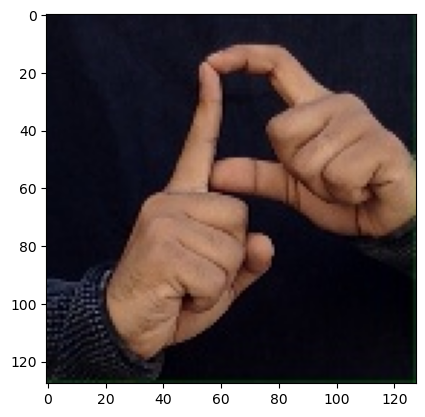

A = 1.7945704130982763%
B = 1.5218106421237254%
C = 3.78817327087774%
D = 46.780891302575014%
E = 2.0731022408589728%
F = 2.564689552324247%
G = 1.883153057829216%
H = 0.4587445341227408%
I = 1.4945651519436576%
J = 3.159526834204408%
K = 4.149693146734808%
L = 0.838812576958641%
M = 1.0312886959996228%
N = 2.1224115925853138%
O = 1.4216880892839174%
P = 1.17773573091521%
Q = 5.039859166584063%
R = 0.5041620632128011%
S = 1.2613644394297594%
T = 0.6397702926491847%
U = 4.1233014194797235%
V = 2.069117384330444%
W = 3.281916826664119%
X = 1.3384402686436787%
Y = 1.0936950748717926%
Z = 4.3875162316989575%
The predicted image is : D
Is the image a D ?(y/n)
y
Thank you for giving your feedback


In [13]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\E\15.jpg


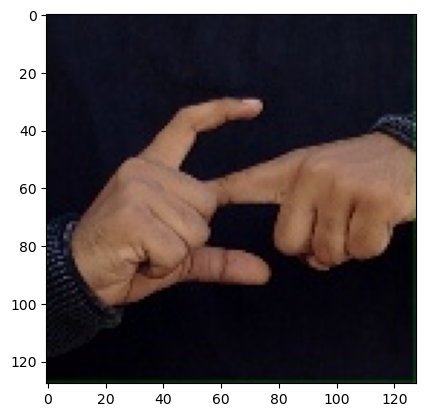

A = 5.594874110828997%
B = 2.0787852572370022%
C = 3.7523413848011993%
D = 0.7217469205917246%
E = 51.15006783474474%
F = 0.6675788667942744%
G = 1.3678741895189335%
H = 0.44466519920968917%
I = 1.9553529843373454%
J = 0.7235737561034269%
K = 0.8685362400447747%
L = 0.7935141189314141%
M = 0.5691805333410557%
N = 0.8703329873121239%
O = 1.384027880206012%
P = 1.6113796518473187%
Q = 4.542783942118042%
R = 0.3750921774677994%
S = 0.8916208262733587%
T = 0.6414201479236851%
U = 2.2204129390710503%
V = 1.9479711646727758%
W = 6.740006279184358%
X = 3.2224020120572896%
Y = 1.4941596116300149%
Z = 3.3702989837515864%
The predicted image is : E
Is the image a E ?(y/n)
y
Thank you for giving your feedback


In [14]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\F\16.jpg


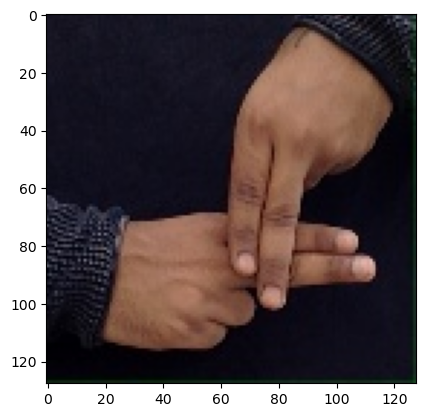

A = 2.7163808864443664%
B = 1.2485096592265217%
C = 2.4031311869081744%
D = 1.004756142330504%
E = 0.7970853199088282%
F = 47.74996638846851%
G = 3.1318305288873667%
H = 0.4901681457401466%
I = 3.411514618745571%
J = 2.604271152691966%
K = 5.54208517975984%
L = 1.4356056417010397%
M = 1.0334414364237563%
N = 1.696674512581569%
O = 0.9894217875068171%
P = 1.884686443437519%
Q = 3.1353524420165284%
R = 0.4641600981604879%
S = 1.2097375122839855%
T = 0.8445744923560738%
U = 5.020172026007395%
V = 3.3884539076181213%
W = 3.696673920802364%
X = 1.598421705378756%
Y = 1.3413288787144384%
Z = 1.1615959858994602%
The predicted image is : F
Is the image a F ?(y/n)
y
Thank you for giving your feedback


In [15]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\G\14.jpg


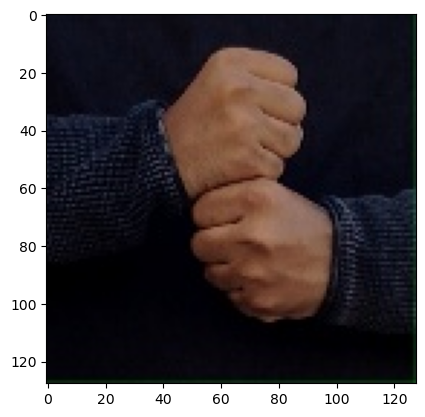

A = 3.1313423694074185%
B = 2.356633270426381%
C = 1.4863574323658393%
D = 0.45861959912497735%
E = 0.6649767198463847%
F = 0.6581737358554121%
G = 50.224652546786345%
H = 0.43562729464349137%
I = 6.7873416490088765%
J = 0.6627913239449206%
K = 1.1372084708839678%
L = 1.0646507772393161%
M = 0.6723593377024667%
N = 1.3214699070489138%
O = 1.3304935903635249%
P = 4.1760063723787715%
Q = 2.2918295008606258%
R = 0.35410563847253884%
S = 1.0186414616884032%
T = 1.128226000022341%
U = 1.895177617319357%
V = 6.392751326800722%
W = 2.8360876376211244%
X = 4.201872159161227%
Y = 1.8766613226057476%
Z = 1.4359429384208644%
The predicted image is : G
Is the image a G ?(y/n)
y
Thank you for giving your feedback


In [16]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\H\13.jpg


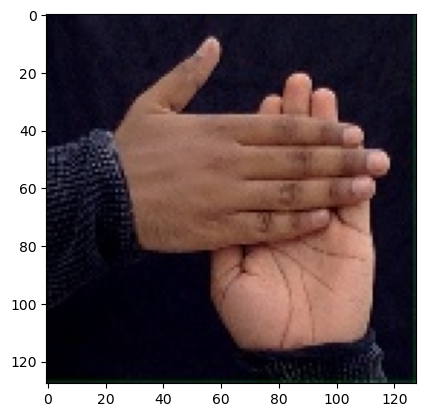

A = 1.8093900349117806%
B = 1.8236692760436184%
C = 1.4159682713978081%
D = 0.6102250599626938%
E = 1.086524192054653%
F = 1.25725516760961%
G = 4.145110401443949%
H = 50.41209030033662%
I = 2.0874137166625513%
J = 0.6686029822659865%
K = 0.804374341918368%
L = 4.58349754796226%
M = 3.7613217110176684%
N = 2.0996939146300986%
O = 1.6671618825719265%
P = 5.7158434697808085%
Q = 1.2329941044181876%
R = 0.7338868829872849%
S = 0.7023619777224617%
T = 1.2600982629001953%
U = 1.1056148589776225%
V = 1.380340507918961%
W = 4.337518127052936%
X = 0.9379616536835722%
Y = 2.2420230666552903%
Z = 2.119058287113091%
The predicted image is : H
Is the image a H ?(y/n)
y
Thank you for giving your feedback


In [17]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\I\12.jpg


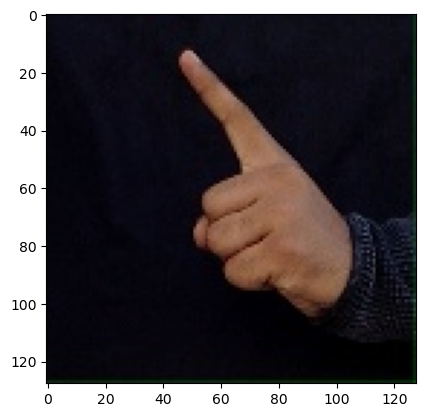

A = 4.211922056073165%
B = 2.3491526837544336%
C = 1.487959856441682%
D = 0.42294518575208595%
E = 0.6796945007916897%
F = 0.6264888748594141%
G = 4.266551485542687%
H = 0.395264872325146%
I = 49.79293294491299%
J = 0.5928597069602516%
K = 1.0302327917452814%
L = 1.1528267223304065%
M = 0.5312483417435%
N = 0.8868848199047409%
O = 1.3399375071577213%
P = 3.4022038970172064%
Q = 2.6895747641842567%
R = 0.3105114222279382%
S = 1.081156531540117%
T = 0.9505468518562897%
U = 2.5533442979633003%
V = 6.798445613327031%
W = 3.0491982951276806%
X = 6.106080729758103%
Y = 1.9332447644015014%
Z = 1.358790482301376%
The predicted image is : I
Is the image a I ?(y/n)
y
Thank you for giving your feedback


In [18]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\J\12.jpg


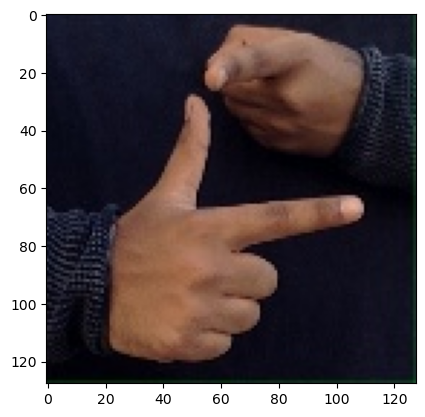

A = 3.0110026407435133%
B = 1.4101166680598105%
C = 4.6405613856147205%
D = 1.082468389780532%
E = 0.8382182509054197%
F = 1.9664100978801897%
G = 2.4047724947728124%
H = 0.38542580046948877%
I = 2.1405634862946443%
J = 46.92849934023583%
K = 4.977469207065903%
L = 1.0903664430310014%
M = 0.7436978890682168%
N = 1.3437611271506908%
O = 0.7617870615233813%
P = 2.0754943737462295%
Q = 2.740858556712659%
R = 0.4129419761103666%
S = 1.9548482981951019%
T = 0.8380440821649066%
U = 4.992617088242887%
V = 4.282488141303634%
W = 3.2175581608601926%
X = 2.3100378149368885%
Y = 1.857144285502577%
Z = 1.5928469396284628%
The predicted image is : J
Is the image a J ?(y/n)
y
Thank you for giving your feedback


In [19]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\K\13.jpg


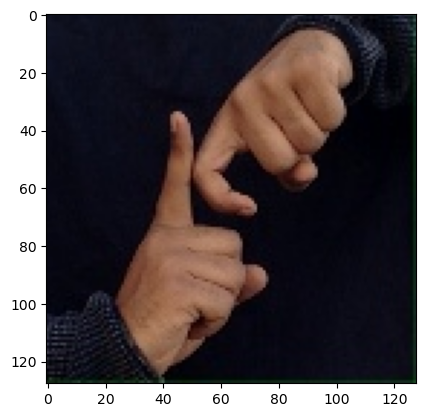

A = 3.027463515446359%
B = 2.092895524681974%
C = 3.1060148366497167%
D = 0.6786832146350099%
E = 0.6533943943865247%
F = 1.33693855695508%
G = 2.54507583682796%
H = 0.364007806522517%
I = 3.090435737785185%
J = 1.4907963579579404%
K = 47.783696524627715%
L = 0.8620223171158348%
M = 0.6719151817249214%
N = 1.7409372899947877%
O = 0.9668683018454527%
P = 2.5636340044160555%
Q = 4.1397395588846715%
R = 0.3621825034801213%
S = 1.6462372953150248%
T = 0.7869081074109787%
U = 4.015218364049904%
V = 6.316329437595562%
W = 2.6383180229704077%
X = 3.9274898985865607%
Y = 1.8445534091973599%
Z = 1.3482440009363477%
The predicted image is : K
Is the image a K ?(y/n)
y
Thank you for giving your feedback


In [20]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\L\11.jpg


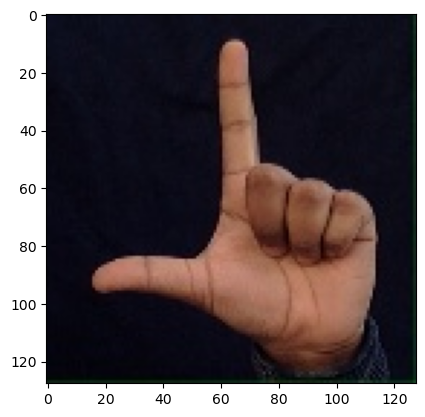

A = 3.388158014040757%
B = 1.464740040793988%
C = 1.5510563486902023%
D = 0.4494912351858412%
E = 0.6886871812928497%
F = 0.8361847495829898%
G = 3.6169921780193244%
H = 0.585308222541802%
I = 6.512442939120948%
J = 0.7466911429455462%
K = 1.0434732145652736%
L = 52.05944853866967%
M = 0.6551711800996616%
N = 0.8671266670260835%
O = 1.0176130183860779%
P = 3.8909524226077554%
Q = 1.7372869895157534%
R = 0.33860366490975%
S = 1.0275825889515537%
T = 1.0070383230745947%
U = 2.374731301851316%
V = 5.363789673591568%
W = 3.2291959924626163%
X = 2.7358113137046574%
Y = 1.6763560167236704%
Z = 1.1360670416456997%
The predicted image is : L
Is the image a L ?(y/n)
y
Thank you for giving your feedback


In [21]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\M\11.jpg


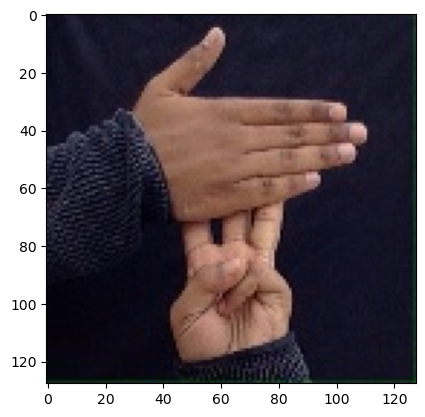

A = 1.2637614803029942%
B = 1.7831454426394902%
C = 1.7406487753169015%
D = 0.6911865585772379%
E = 0.7380315656353967%
F = 1.2510663601187013%
G = 4.68439090885042%
H = 0.8574302397375151%
I = 2.2067502804653514%
J = 0.9394255601757998%
K = 1.7371198583911132%
L = 1.1743110895536812%
M = 48.60426009706859%
N = 6.144359222236004%
O = 1.1464902818716018%
P = 3.7138510009169083%
Q = 1.9806855588563643%
R = 0.8596558462258175%
S = 1.5885255348950786%
T = 1.7509013188501394%
U = 2.2817183415868603%
V = 4.155374350310193%
W = 2.8753278517781986%
X = 1.4565664280455652%
Y = 2.529890042752632%
Z = 1.8451260048413898%
The predicted image is : M
Is the image a M ?(y/n)
y
Thank you for giving your feedback


In [22]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\N\12.jpg


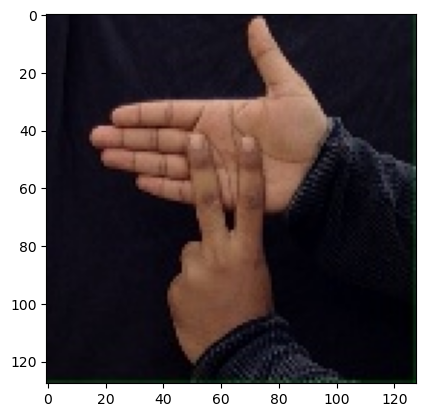

A = 2.1117385083653795%
B = 3.3413134650952707%
C = 1.9073689083651129%
D = 0.5975957800519707%
E = 0.7046089151887789%
F = 0.8082485540852231%
G = 4.978509446640297%
H = 0.44860844718044907%
I = 2.767430564666647%
J = 0.7927585547079307%
K = 2.1971501623485663%
L = 0.8096353261371524%
M = 1.5487295014466695%
N = 46.50674445918801%
O = 1.035411394317638%
P = 4.366719782168934%
Q = 3.139502167162801%
R = 0.4984086891755537%
S = 1.5210288672929961%
T = 1.0295855976878432%
U = 2.9783344156845692%
V = 5.678530038332771%
W = 2.76139854639403%
X = 3.504597473126825%
Y = 2.528101467991832%
Z = 1.4379409671967962%
The predicted image is : N
Is the image a N ?(y/n)
y
Thank you for giving your feedback


In [23]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\O\11.jpg


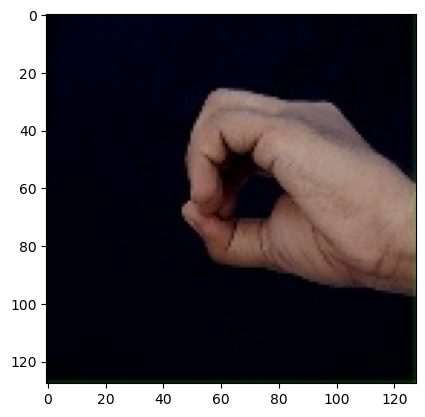

A = 4.995873404905772%
B = 3.931289993537029%
C = 1.262407356369723%
D = 0.4896344633305989%
E = 0.8727122772742713%
F = 0.5815007885665651%
G = 3.216955215729031%
H = 0.42182793522641043%
I = 5.703217279743324%
J = 0.5338239694289317%
K = 0.9516657124407026%
L = 0.8288136358648397%
M = 0.564070579362776%
N = 0.9028572833896156%
O = 48.18101950992909%
P = 2.412483376162228%
Q = 3.51652614530188%
R = 0.3191781777114131%
S = 0.8849472545264452%
T = 0.7022658498458062%
U = 1.6985741033088027%
V = 4.5054553151234344%
W = 3.6396158188134304%
X = 4.467499223173046%
Y = 1.4113260505395455%
Z = 3.0044592803952472%
The predicted image is : O
Is the image a O ?(y/n)
y
Thank you for giving your feedback


In [24]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\P\12.jpg


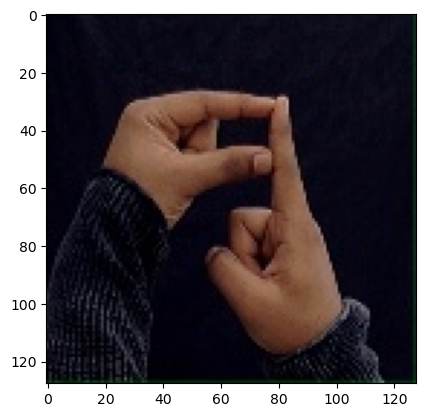

A = 3.69815666382399%
B = 2.7545935546848077%
C = 1.6189992359346932%
D = 0.41511768047324876%
E = 0.6769449391799024%
F = 0.5815211822344446%
G = 3.777656699137915%
H = 0.4645541663871805%
I = 4.84873968895692%
J = 0.6133980511661424%
K = 1.0622409361923875%
L = 1.0389130789205359%
M = 0.6144535763954986%
N = 1.1520274308486855%
O = 1.0825585739554269%
P = 48.709856350612604%
Q = 2.579362624705473%
R = 0.32993468064080067%
S = 1.1654289103251647%
T = 1.02237811688769%
U = 2.329470132794355%
V = 6.656775606225329%
W = 2.6553336215962293%
X = 5.966630828734823%
Y = 2.9025071182309707%
Z = 1.2824465509547816%
The predicted image is : P
Is the image a P ?(y/n)
y
Thank you for giving your feedback


In [25]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\Q\11.jpg


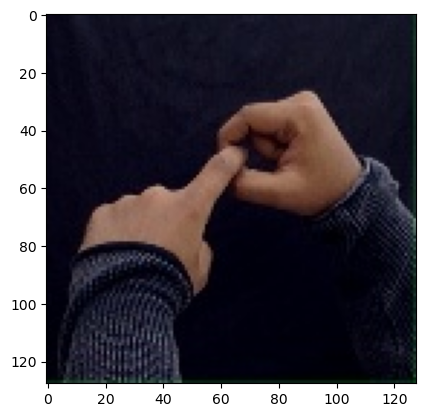

A = 4.91248370080458%
B = 3.515039269348507%
C = 2.373567521628679%
D = 0.5427000267381865%
E = 0.9306543717795884%
F = 0.6647022582506059%
G = 2.0092491870928675%
H = 0.36587191608807007%
I = 3.642864642612392%
J = 0.6542078350859619%
K = 1.312915507862464%
L = 0.7756518437676791%
M = 0.5260660963937496%
N = 1.0005550826827079%
O = 1.2395299720211177%
P = 2.547559978888539%
Q = 49.050243017754305%
R = 0.32792346157505525%
S = 1.1430627052936166%
T = 0.7461111720870617%
U = 2.8976110812969598%
V = 6.011930364237406%
W = 2.9712700425545595%
X = 6.004533708539906%
Y = 1.865930137209984%
Z = 1.9677650984054804%
The predicted image is : Q
Is the image a Q ?(y/n)
y
Thank you for giving your feedback


In [26]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\R\1.jpg


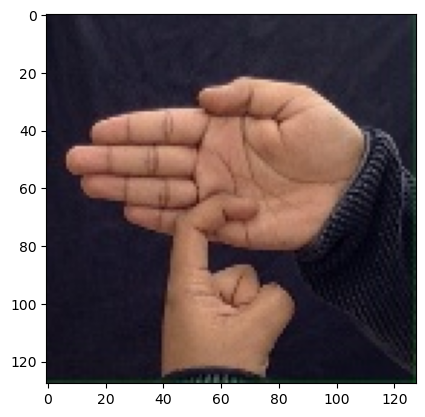

A = 0.7057933569149131%
B = 1.9090100139208512%
C = 1.3764259960955652%
D = 1.5943500110824356%
E = 1.2587815169367473%
F = 2.857074798609117%
G = 2.4287562311980255%
H = 1.6936955161641793%
I = 0.6668008139173567%
J = 2.113080399705878%
K = 2.2563373770858464%
L = 0.8846092437280908%
M = 7.164221599912349%
N = 4.179497536588957%
O = 0.8013552729885551%
P = 1.6085589477197553%
Q = 1.5453362906396069%
R = 53.82530125558249%
S = 1.5358839680726801%
T = 1.2413349187537304%
U = 1.7791749086355044%
V = 0.7978627304213315%
W = 2.250287600829807%
X = 0.5928911725568543%
Y = 1.256979555950307%
Z = 1.6765989659890557%
The predicted image is : R
Is the image a R ?(y/n)
y
Thank you for giving your feedback


In [27]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\S\12.jpg


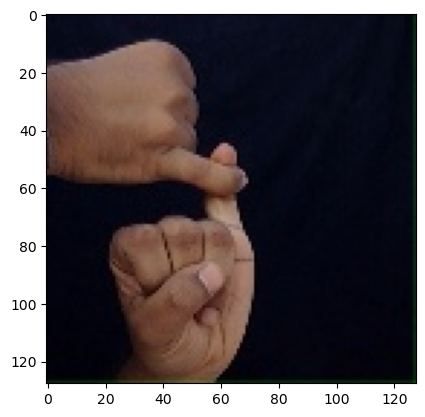

A = 3.2050089487441897%
B = 2.3505374965506904%
C = 2.5183012216105456%
D = 0.4788203753799902%
E = 0.6654162427736005%
F = 0.640455323990909%
G = 1.8801866952029895%
H = 0.3609044732536285%
I = 3.136945630513354%
J = 0.8636279831139755%
K = 1.5711859368836418%
L = 0.8534695710322449%
M = 0.6650726938796514%
N = 1.247981737100031%
O = 0.8808789890883751%
P = 3.0047415532329618%
Q = 2.822819293069676%
R = 0.3516414850723814%
S = 48.1700218303527%
T = 1.1187188927595393%
U = 4.358071034724524%
V = 6.7795343264085%
W = 2.541008906691821%
X = 4.683099813538162%
Y = 3.6452433183051483%
Z = 1.2063062267266411%
The predicted image is : S
Is the image a S ?(y/n)
y
Thank you for giving your feedback


In [28]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\T\12.jpg


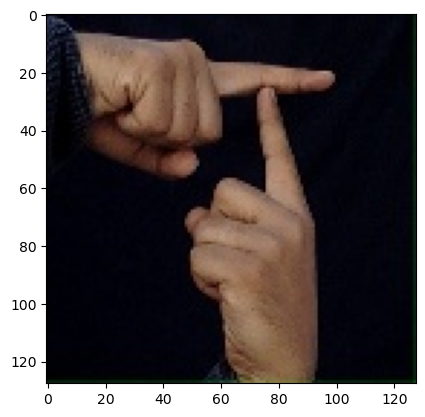

A = 2.154332165073681%
B = 1.7253038238849434%
C = 1.3758215423846496%
D = 0.4343244983018235%
E = 0.6161586590602904%
F = 0.6464338027888874%
G = 5.336594921866711%
H = 0.45101636356629815%
I = 4.586623106487394%
J = 0.6824828645114301%
K = 1.0410289176435128%
L = 1.1235482057368975%
M = 0.9119735538621752%
N = 1.3023389351644659%
O = 0.8950674971179182%
P = 4.7189966963630425%
Q = 1.8457173117599213%
R = 0.3699719718525528%
S = 1.7240523599819078%
T = 49.67761240128095%
U = 2.4391150514033995%
V = 6.997100277904371%
W = 2.128655688339505%
X = 3.154770316714671%
Y = 2.555331788412987%
Z = 1.1056272785356533%
The predicted image is : T
Is the image a T ?(y/n)
y
Thank you for giving your feedback


In [29]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\U\14.jpg


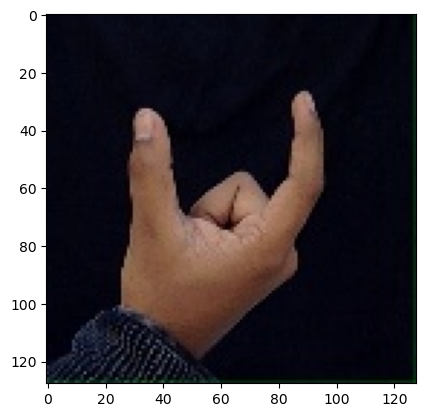

A = 3.1660052355524875%
B = 2.067366254102378%
C = 2.440802236552014%
D = 0.5209257610598937%
E = 0.7625463488709541%
F = 0.7993712867268138%
G = 1.8345673155682616%
H = 0.3683378123092466%
I = 3.8298505162961565%
J = 0.8321743114161931%
K = 1.4159642064873714%
L = 0.9109900043077223%
M = 0.5733902093365316%
N = 1.0481793018396521%
O = 0.9365762908231869%
P = 2.6330988999528517%
Q = 3.1967332756685938%
R = 0.33918505907013574%
S = 1.4994114284245907%
T = 0.8538025039543689%
U = 51.32237401111416%
V = 6.3345003219949225%
W = 3.8761948226549174%
X = 4.925791750114648%
Y = 2.369563187127268%
Z = 1.1422976486747916%
The predicted image is : U
Is the image a U ?(y/n)
y
Thank you for giving your feedback


In [30]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\V\12.jpg


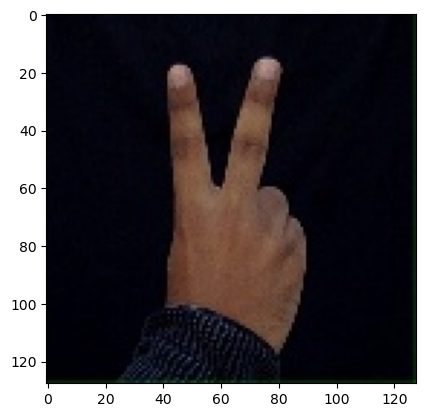

A = 4.031877528482116%
B = 2.856310896992432%
C = 1.9545789955874187%
D = 0.42865320061386547%
E = 0.6496485257934611%
F = 0.5890310885969603%
G = 3.273290904622522%
H = 0.36024295828952985%
I = 5.462008891204198%
J = 0.6565868702671083%
K = 1.260607913893155%
L = 0.9722668220305319%
M = 0.574946677107269%
N = 1.0156087922466372%
O = 1.0986769166502737%
P = 3.635669513731263%
Q = 3.3548279707055677%
R = 0.305637274609887%
S = 1.3282132049649042%
T = 1.0031793405335636%
U = 3.2429452110302583%
V = 48.347461871241975%
W = 2.819732775484122%
X = 6.881699084542594%
Y = 2.5658752542203898%
Z = 1.3304215165579865%
The predicted image is : V
Is the image a V ?(y/n)
y
Thank you for giving your feedback


In [31]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\W\12.jpg


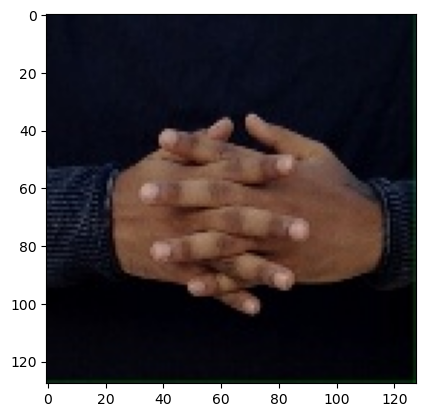

A = 6.145713767041827%
B = 2.1543457460124067%
C = 2.815848441752245%
D = 0.47709972309047477%
E = 1.0749240771977908%
F = 0.6539380480390257%
G = 2.5612979543152714%
H = 0.42637182995667106%
I = 4.466138158723732%
J = 0.6757976592493775%
K = 1.0673749826159735%
L = 0.9687498322028747%
M = 0.5694715653959032%
N = 0.9473505948352091%
O = 1.2845721223606428%
P = 2.638922714433969%
Q = 3.0004421806132293%
R = 0.33506301357836527%
S = 1.0747298607353357%
T = 0.7797001794152434%
U = 3.2018452997746234%
V = 5.138857199154929%
W = 47.80589421695148%
X = 5.390288430575973%
Y = 2.331763785414999%
Z = 2.0134986165623365%
The predicted image is : W
Is the image a W ?(y/n)
y
Thank you for giving your feedback


In [32]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")


Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\X\12.jpg


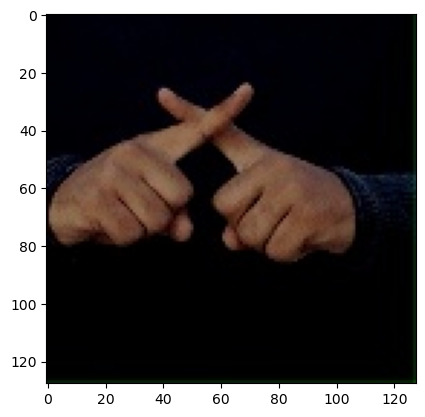

A = 5.035680583119379%
B = 3.5294737489923684%
C = 1.6340620615385493%
D = 0.4124010403925114%
E = 0.7525991658695594%
F = 0.5341141444169832%
G = 2.4023536707555295%
H = 0.35530933595146696%
I = 5.1182976938149665%
J = 0.587320270686079%
K = 1.0579454100009207%
L = 0.8278213930817591%
M = 0.4777733257718111%
N = 0.8931255716122496%
O = 1.121317598610434%
P = 3.422742130112206%
Q = 3.405194748578129%
R = 0.3060939711846212%
S = 1.1691828656980454%
T = 0.8191310241477574%
U = 2.7136401971470545%
V = 7.076897561818408%
W = 3.063131615416117%
X = 49.497326074183626%
Y = 2.354439560728762%
Z = 1.4326252363706822%
The predicted image is : X
Is the image a X ?(y/n)
y
Thank you for giving your feedback


In [33]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")


Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\Y\12.jpg


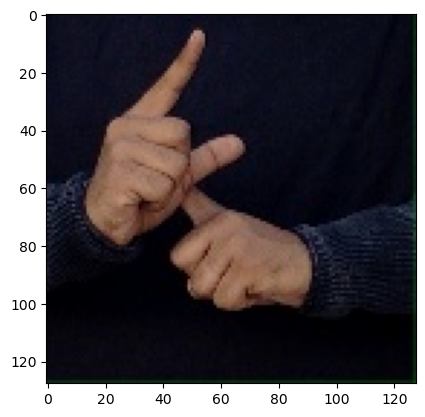

A = 3.2533699794345656%
B = 2.4637984201233345%
C = 2.4785459080632766%
D = 0.4202780990274244%
E = 0.7003486114471936%
F = 0.5633999320623612%
G = 2.2126104222973564%
H = 0.41072953800994194%
I = 3.355950175402131%
J = 0.6426477188713843%
K = 1.0372452773025964%
L = 0.8496992900456792%
M = 0.6115694926511307%
N = 1.0786568183446605%
O = 0.921762873801771%
P = 4.489647233076939%
Q = 2.44755399046264%
R = 0.32997070204907913%
S = 1.5948068261212311%
T = 0.9408576381586317%
U = 2.9219972219858827%
V = 6.5819601895226825%
W = 3.3734293517748988%
X = 5.530834805635356%
Y = 49.64619211111287%
Z = 1.1421373732149604%
The predicted image is : Y
Is the image a Y ?(y/n)
y
Thank you for giving your feedback


In [34]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")


Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Alphabet\Z\11.jpg


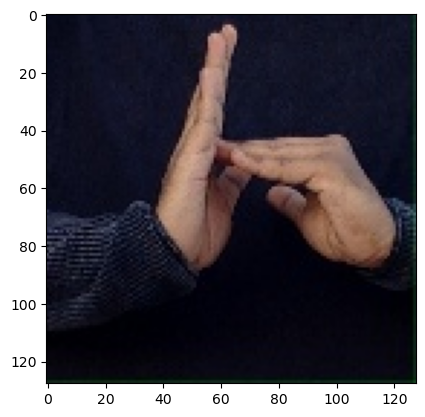

A = 6.125175588162584%
B = 2.936286761332832%
C = 1.9386323864453412%
D = 0.5989308554809455%
E = 1.1762920900600426%
F = 0.5617400236498047%
G = 2.523437445674177%
H = 0.41655185456200233%
I = 3.3554682325873477%
J = 0.6915358383946093%
K = 1.046137651021572%
L = 0.7852477324032126%
M = 0.6202543865469108%
N = 0.9751034396675103%
O = 2.245999906324794%
P = 2.333906883974614%
Q = 4.422919599620658%
R = 0.34092588978424704%
S = 0.9818708856698107%
T = 0.7299307441912494%
U = 1.708625579490119%
V = 4.105874362932802%
W = 4.848352619547175%
X = 4.729226440095779%
Y = 1.5016367046010595%
Z = 48.29993609777886%
The predicted image is : Z
Is the image a Z ?(y/n)
y
Thank you for giving your feedback


In [35]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model_alpha.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model_alpha.p','wb'))
print("Thank you for giving your feedback")


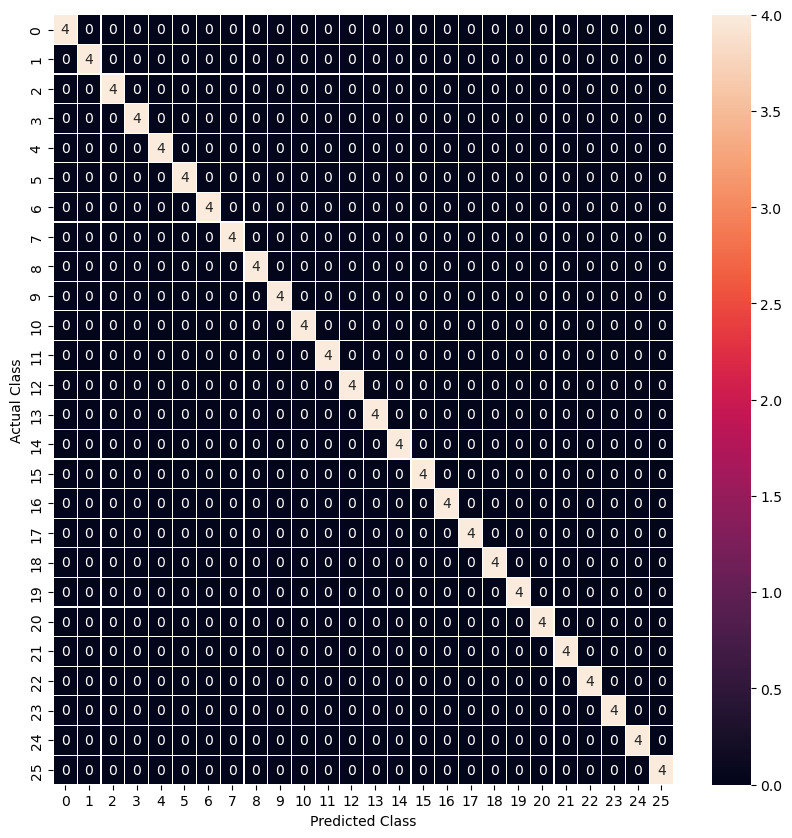

In [36]:
# import libraries
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns            # visualization tool

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=.1, fmt= '.0f',ax=ax)     # generating a heat map
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [37]:
print(classification_report(y_test,y_pred))  
# y_test: the actual labels
# y_pred: the predicted labels

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         4
          17       1.00    

# Evaluating the model

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [39]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
